In [1]:
import os, sys

from easydict import EasyDict
import matplotlib.pyplot as plt
import numpy as np

# import mlflow
import ipywidgets as widgets
from ipywidgets import interact

import numpy as np
import seaborn as sns

import scipy
# scipy.spatial.distance.pdist() # to list possible distance metrics
from scipy.cluster import hierarchy

from backports import tarfile

In [7]:
from cardiac_motion_upe import EnsembleGWASResults, fetch_loci_mapping

import cardiac_motion
from cardiac_motion.utils.mlflow_read_helpers import Run

In [ ]:
compute_thickness_per_aha

In [ ]:
loci_mapping = fetch_loci_mapping()

In [ ]:
results = EnsembleGWASResults(root_dir="/mnt/data/workshop/workshop-user1/output/GWAS/Unsupervised_spatiotemporal/")
# results = EnsembleGWASResults(root_dir="/mnt/data/workshop/workshop-user1/output/GWAS/All_partitions_spatiotemporal/")

2024-02-25 02:19:34 - INFO - Found 1353 files under the folder /mnt/data/workshop/workshop-user1/output/GWAS/Unsupervised_spatiotemporal//summaries
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1353/1353 [00:06<00:00, 222.53it/s]
2024-02-25 02:19:40 - INFO - Collected GWAS summary data for 1353 phenotypes.
2024-02-25 02:19:40 - INFO - Concatenating...
2024-02-25 02:19:43 - INFO - Assigning dynamic/static label to phenotypes...


In [ ]:
results.region_assocs_df

,pheno,region,CHR,SNP,BP,AF,a_0,a_1,BETA,SE,...,P,expid,chamber,run,full_pheno,INFO,variable_type,msd_static,msd_dynamic,rec_ratio
0,z000,chr1_1,1,rs116720752,1508331.0,0.003064,A,G,-0.549850,0.162570,...,0.000720,3,RV,4786e2deaa6d4621bfe73b4c69095e33,4786e2deaa6d4621bfe73b4c69095e33_z000,NaN,static,1.180565,1.496581,0.549407
1,z000,chr1_10,1,rs112403579,12906910.0,0.049464,T,A,0.076013,0.019956,...,0.000140,3,RV,4786e2deaa6d4621bfe73b4c69095e33,4786e2deaa6d4621bfe73b4c69095e33_z000,NaN,static,1.180565,1.496581,0.549407
2,z000,chr1_100,1,rs773213342,196406419.0,0.871100,AT,A,0.034022,0.010660,...,0.001416,3,RV,4786e2deaa6d4621bfe73b4c69095e33,4786e2deaa6d4621bfe73b4c69095e33_z000,NaN,static,1.180565,1.496581,0.549407
3,z000,chr1_101,1,rs572048024,199064928.0,0.005106,G,GA,-0.185260,0.050761,...,0.000263,3,RV,4786e2deaa6d4621bfe73b4c69095e33,4786e2deaa6d4621bfe73b4c69095e33_z000,NaN,static,1.180565,1.496581,0.549407
4,z000,chr1_102,1,rs72735453,199516164.0,0.039012,T,C,-0.064432,0.018228,...,0.000409,3,RV,4786e2deaa6d4621bfe73b4c69095e33,4786e2deaa6d4621bfe73b4c69095e33_z000,NaN,static,1.180565,1.496581,0.549407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274388,z031,chr9_71,9,rs61502474,137238495.0,0.059853,C,T,-0.055688,0.013941,...,0.000065,NaN,LA,f345e14868744300b03d222c8dbc38a7,f345e14868744300b03d222c8dbc38a7_z031,0.98913,dynamic,0.426979,1.256401,inf
2274389,z031,chr9_72,9,rs17040188,138310488.0,0.003404,A,G,-0.332520,0.093362,...,0.000369,NaN,LA,f345e14868744300b03d222c8dbc38a7,f345e14868744300b03d222c8dbc38a7_z031,0.96545,dynamic,0.426979,1.256401,inf
2274390,z031,chr9_73,9,rs11103342,139021644.0,0.177840,T,C,0.028909,0.008611,...,0.000788,NaN,LA,f345e14868744300b03d222c8dbc38a7,f345e14868744300b03d222c8dbc38a7_z031,0.99698,dynamic,0.426979,1.256401,inf
2274391,z031,chr9_8,9,9:7495422_GA_G,7495422.0,0.137710,GA,G,0.039810,0.009701,...,0.000041,NaN,LA,f345e14868744300b03d222c8dbc38a7,f345e14868744300b03d222c8dbc38a7_z031,0.96510,dynamic,0.426979,1.256401,inf


In [ ]:
#cooccurrence = signif_df.dot(signif_df.transpose())

VARIABLE_TYPE = "dynamic"
CHAMBER = "BV"

kk = results.region_assocs_df[(results.region_assocs_df.variable_type == VARIABLE_TYPE) & (results.region_assocs_df.chamber == CHAMBER)]
log10p_matrix = -np.log10(kk.pivot(index=["run", "pheno"], columns="region", values="P"))
signif_df = (log10p_matrix > 6.3).astype(int)
signif_df = signif_df.drop(loci_mapping.index[~loci_mapping["duplicated"].isnull()], axis=1)

cooccurrence = signif_df.transpose().dot(signif_df)

cooccurrence = cooccurrence.loc[
    np.diagonal(cooccurrence) > 2,
    np.diagonal(cooccurrence) > 2
    #cooccurrence.columns[cooccurrence.sum() > 100],
    #cooccurrence.columns[cooccurrence.sum() > 100]
]

counts = np.kron(    
    np.ones((len(np.diagonal(cooccurrence)))).reshape(-1,1),
    np.diagonal(cooccurrence).reshape(1,-1)
)

cooccurrence_freq = cooccurrence / counts

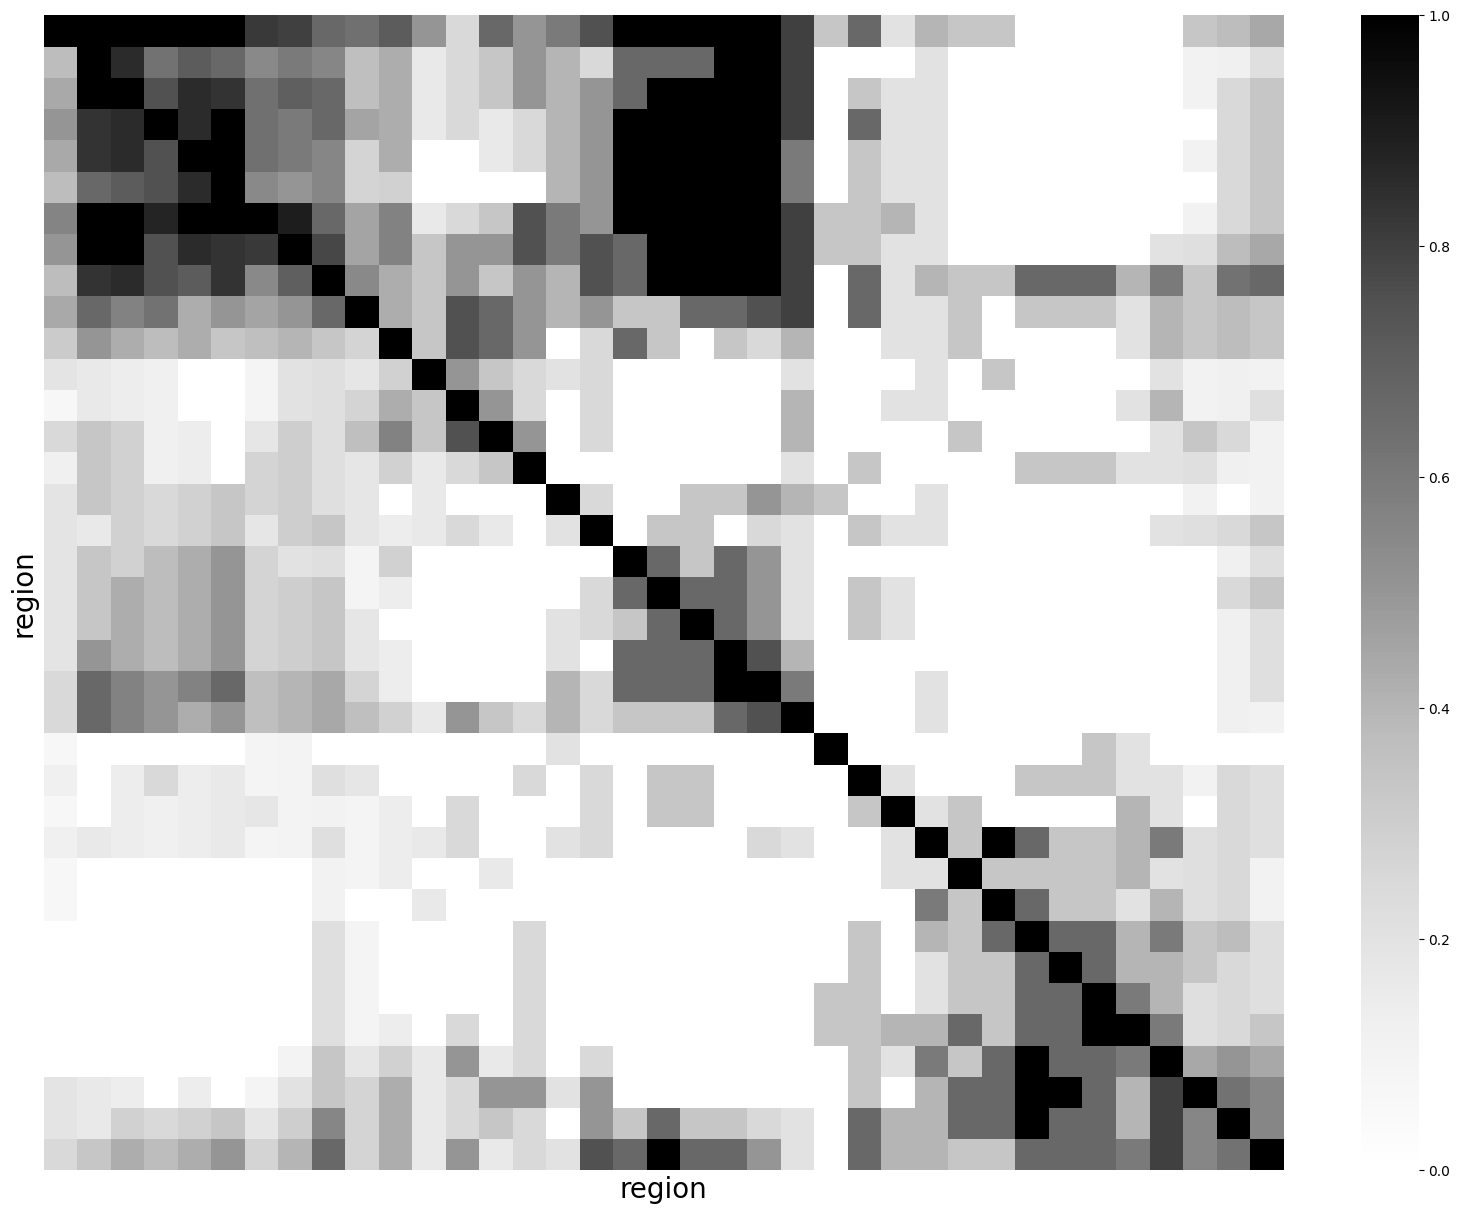

In [ ]:
# dendrogram = hierarchy.linkage(cooccurrence, method='average', metric="sqeuclidean", optimal_ordering=True)
dendrogram = hierarchy.linkage(cooccurrence, method='average', optimal_ordering=True)

reordered_matrix = cooccurrence_freq.iloc[
    hierarchy.leaves_list(dendrogram), 
    hierarchy.leaves_list(dendrogram)
]

# reordered_matrix -= reordered_matrix * np.identity(reordered_matrix.shape[0])

subsetted_matrix = reordered_matrix # .iloc[:75, :75]

fig, axes = plt.subplots(figsize=(20,15))

plt.xlabel('Locus', fontsize=20)  # Adjust fontsize as desired
plt.ylabel('Locus', fontsize=20)  # Adjust fontsize as desired

plt.xticks(fontsize=16)  # Adjust fontsize as desired
plt.yticks(fontsize=16)  # Adjust fontsize as desired

sns.heatmap(
    subsetted_matrix,
    cmap='Greys', xticklabels="", yticklabels="",
    # xticklabels=loci_mapping.loc[subsetted_matrix.columns, "candidate_gene"], 
    # yticklabels=loci_mapping.loc[subsetted_matrix.columns, "candidate_gene"],    
    ax = axes,
    
);

fig = plt.gcf()
ax = fig.axes[-1]
# plt.colorbar(label='Fraction of co-occurrence')

cbar = ax.collections[0].colorbar
# cbar.axes.tick_params(labelsize=12)  # Adjust fontsize as desired

# plt.show()

In [ ]:
reordered_matrix#.iloc[:5,:5]

region,chr2_108,chr12_2,chr15_35,chr20_22,chr5_103,chr7_62,chr12_17,chr12_23,chr14_33,chr14_3,...,chr4_113,chr4_72,chr3_104,chr13_2,chr1_124,chr12_70,chr8_82,chr10_74,chr1_5,chr6_78
region,,,,,,,,,,,,,,,,,,,,,
chr2_108,1.0000,1.000000,1.000000,1.000,1.000000,1.000000,0.818182,0.8,0.666667,0.636364,...,0.333333,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.375,0.444444
chr12_2,0.3750,1.000000,0.857143,0.625,0.714286,0.666667,0.545455,0.6,0.555556,0.363636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.111111,0.125,0.222222
chr15_35,0.4375,1.000000,1.000000,0.750,0.857143,0.833333,0.636364,0.7,0.666667,0.363636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.111111,0.250,0.333333
chr20_22,0.5000,0.833333,0.857143,1.000,0.857143,1.000000,0.636364,0.6,0.666667,0.454545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.250,0.333333
chr5_103,0.4375,0.833333,0.857143,0.750,1.000000,1.000000,0.636364,0.6,0.555556,0.272727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.111111,0.250,0.333333
chr7_62,0.3750,0.666667,0.714286,0.750,0.857143,1.000000,0.545455,0.5,0.555556,0.272727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.250,0.333333
chr12_17,0.5625,1.000000,1.000000,0.875,1.000000,1.000000,1.000000,0.9,0.666667,0.454545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.111111,0.250,0.333333
chr12_23,0.5000,1.000000,1.000000,0.750,0.857143,0.833333,0.818182,1.0,0.777778,0.454545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.2,0.222222,0.375,0.444444
chr14_33,0.3750,0.833333,0.857143,0.750,0.714286,0.833333,0.545455,0.7,1.000000,0.545455,...,0.333333,0.333333,0.666667,0.666667,0.666667,0.4,0.6,0.333333,0.625,0.666667


In [ ]:
REGION = "chr12_69"
reordered_matrix.loc[[REGION], :].transpose().sort_values(ascending=False, by=REGION)

KeyError: "None of [Index(['chr12_69'], dtype='object', name='region')] are in the [index]"